# Importing Required Libraries
 These libraries will be used throughout the notebook for analysis and visualization purposes.

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading and Previewing the Data
This step is essential for understanding the dataset's attributes and values before proceeding with analysis.

In [2]:
# Reading the CSV file using pandas
data = pd.read_csv('H4M_dataset.csv')
data.head()

,id,TtlPrc,UntPrc,Year,Elvt,RmNum,HllNum,KchNum,BthNum,Lat,...,RstNum,RstDst,RtlNum,RtlDst,TrfV,AgrPct,DstPct,HppPct,SadPct,FeaPct
0,101087602731,24660,82533,2010,1,4,1,1,3,40.006694,...,100,150,55,279,0.000000,13,7,33,20,24
1,101088604521,12000,67659,1999,1,3,2,0,2,39.979226,...,100,208,52,397,23.570463,11,10,35,19,23
2,101089774839,16500,67205,2007,1,4,2,1,2,39.973845,...,100,238,38,446,41.096296,16,10,33,21,18
3,101089814532,4430,74996,1985,0,2,1,1,1,39.962995,...,100,187,41,357,36.396620,12,10,33,22,21
4,101090871638,5500,32682,2003,1,3,2,1,2,39.943112,...,88,180,32,478,0.000000,11,11,32,24,19


# Removing Irrelevant Features - id and TtlPrc Columns:

In this section, we discuss the rationale behind removing the "id" and "TtlPrc" columns from our dataset. The "id" column primarily serves as a unique identifier for each house entry, carrying no predictive value. Moreover, the "TtlPrc" (Total Price) column introduces the potential for multicollinearity, as it might be directly derived from "Unit Price" (UntPrc) and other factors. This situation could destabilize models like linear regression. Importantly, there's a risk of data leakage if "TtlPrc" is somehow related to the target variable. Thus, our focus should remain on attributes that distinctly impact the prediction of "Unit Price". Furthermore, the column label "UntPrc" is refined to "Price" to enhance the clarity and interpretability of the dataset's attributes. This adjustment contributes to a more intuitive understanding of the data's content.

In [3]:
# Preprocessing and checking the data
data = data.drop('id', axis=1)
data = data.drop('TtlPrc', axis=1)
data = data.rename(columns={"UntPrc": "Price"}) # Renaming the column to improve clarity
print(data.shape)
data.head()

(28550, 27)


,Price,Year,Elvt,RmNum,HllNum,KchNum,BthNum,Lat,Lng,TspNum,...,RstNum,RstDst,RtlNum,RtlDst,TrfV,AgrPct,DstPct,HppPct,SadPct,FeaPct
0,82533,2010,1,4,1,1,3,40.006694,116.486687,39,...,100,150,55,279,0.000000,13,7,33,20,24
1,67659,1999,1,3,2,0,2,39.979226,116.314551,44,...,100,208,52,397,23.570463,11,10,35,19,23
2,67205,2007,1,4,2,1,2,39.973845,116.463587,30,...,100,238,38,446,41.096296,16,10,33,21,18
3,74996,1985,0,2,1,1,1,39.962995,116.449455,50,...,100,187,41,357,36.396620,12,10,33,22,21
4,32682,2003,1,3,2,1,2,39.943112,116.109599,48,...,88,180,32,478,0.000000,11,11,32,24,19



# Table: Dataset Descriptions (Adapted)

| Feature ID | Category  | Feature Name | Description                                                  |
|------------|-----------|--------------|--------------------------------------------------------------|
| 0          | Property  | Year        | Year when the building was constructed.                      |
| 1          | Property  | Elvt        | Indicates if the building contains an elevator.              |
| 2          | Property  | RmNum       | Total bedrooms in the residence.                             |
| 3          | Property  | HllNum      | Count of living and dining areas in the residence.           |
| 4          | Property  | KchNum      | Total kitchens inside the residence.                         |
| 5          | Property  | BthNum      | Total bathrooms within the residence.                        |
| 6          | Property  | Lat         | Geographical latitude of the residence.                      |
| 7          | Property  | Lng         | Geographical longitude of the residence.                     |
| 8          | Amenity   | TspNum      | Count of nearby transportation facilities.                   |
| 9          | Amenity   | TspDst      | Average proximity to nearby transportation facilities.       |
| 10         | Amenity   | AtrNum      | Count of tourist spots in the vicinity.                      |
| 11         | Amenity   | AtrDst      | Mean distance to nearby tourist spots.                       |
| 12         | Amenity   | EdcNum      | Count of educational institutions in the vicinity.           |
| 13         | Amenity   | EdcDst      | Mean distance to nearby educational institutions.            |
| 14         | Amenity   | HthNum      | Count of healthcare facilities around the residence.         |
| 15         | Amenity   | HthDst      | Average distance to these healthcare facilities.             |
| 16         | Amenity   | RstNum      | Count of restaurants in the vicinity.                        |
| 17         | Amenity   | RstDst      | Average distance to these restaurants.                       |
| 18         | Amenity   | RtlNum      | Count of retail outlets in the vicinity.                     |
| 19         | Amenity   | RtlDst      | Mean distance to these retail outlets.                       |
| 20         | Traffic   | TrfV        | Daily average traffic speed.                                 |
| 21         | Emotions  | AgrPct      | Portion of anger emotions from total.                        |
| 22         | Emotions  | DstPct      | Portion of aversion emotions from total.                     |
| 23         | Emotions  | HppPct      | Portion of joy emotions from total.                          |
| 24         | Emotions  | SadPct      | Portion of sorrow emotions from total.                       |
| 25         | Emotions  | FeaPct      | Portion of fear emotions from total.                         |


**Target Variable:**  

| Feature ID | Category  | Feature Name | Description                                                  |
|------------|-----------|--------------|--------------------------------------------------------------|
| 26         | Property  | Price        | Cost per square meter of the residence in Renminbi (RMBa).  |


**Note:** The feature descriptions provided in the preceding table draw inspiration from the work titled "PATE: Property, Amenities, Traffic and Emotions Coming Together for Real Estate Price Prediction," authored by Zhao, Y., Ravi, R., Shi, S., Wang, Z., Lam, E.Y., and Zhao, J. in the year 2022. For an in-depth understanding of these descriptions and to gain further contextual insights, interested readers are encouraged to consult the original paper:

Zhao, Y., Ravi, R., Shi, S., Wang, Z., Lam, E.Y., and Zhao, J. (2022). "PATE: Property, Amenities, Traffic and Emotions Coming Together for Real Estate Price Prediction." arXiv:2209.05471v2 [cs.CY]. Retrieved from https://doi.org/10.48550/arXiv.2209.05471



# Data Preprocessing and Statistical Summary

Data is converted to float type to ensure compatibility with machine learning models, which typically require numerical inputs. Next, we create a summary table showing data types and missing values, and display it. Afterwards we format and display the data statistics with appropriate titles. This step establishes foundational understanding for further analysis.

In [4]:
from IPython.display import display, HTML

# Converting the entire DataFrame to float
data = data.astype(float)

# Combining data type and missing value summary into a single table
summary_table = pd.concat([data.dtypes, data.isnull().sum()], axis=1)
summary_table.columns = ['Data Type', 'Missing Values']

# Creating a divider to separate sections
divider = HTML('<hr style="border: 0.5px solid gray;">')

# Formatting the title for "Data Summary"
title_data_summary = HTML('<h3 style="text-align: left;"> Data Summary</h3>')

# Displaying the combined summary table with divider and title
display(title_data_summary)
display(summary_table)
display(divider)

# Formatting the title for "Data Statistics"
title_data_stats = HTML('<h3 style="text-align: center;"> Data Statistics</h3>')

# Displaying the statistics table with title
data_stats = data.describe()
formatted_stats = data_stats.applymap(lambda x: f'{x:.2f}')
display(title_data_stats)
display(formatted_stats)
display(divider)

,Data Type,Missing Values
Price,float64,0
Year,float64,0
Elvt,float64,0
RmNum,float64,0
HllNum,float64,0
KchNum,float64,0
BthNum,float64,0
Lat,float64,0
Lng,float64,0
TspNum,float64,0


,Price,Year,Elvt,RmNum,HllNum,KchNum,BthNum,Lat,Lng,TspNum,...,RstNum,RstDst,RtlNum,RtlDst,TrfV,AgrPct,DstPct,HppPct,SadPct,FeaPct
count,28550.00,28550.00,28550.00,28550.00,28550.00,28550.00,28550.00,28550.00,28550.00,28550.00,...,28550.00,28550.00,28550.00,28550.00,28550.00,28550.00,28550.00,28550.00,28550.00,28550.00
mean,66056.07,2001.00,0.61,2.23,1.16,0.97,1.31,39.94,116.40,37.29,...,85.46,235.33,32.95,453.11,8.09,12.08,7.68,32.07,22.88,18.71
std,25573.08,9.02,0.49,0.87,0.54,0.20,0.57,0.14,0.29,12.73,...,22.76,124.12,15.70,116.83,14.87,4.30,2.77,8.70,6.72,7.03
min,13209.00,1950.00,0.00,0.00,0.00,0.00,0.00,29.02,101.73,0.00,...,0.00,8.00,0.00,155.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,45760.00,1996.00,0.00,2.00,1.00,1.00,1.00,39.89,116.33,28.00,...,75.00,149.00,19.00,372.00,0.00,11.00,7.00,30.00,21.00,17.00
50%,61924.50,2003.00,1.00,2.00,1.00,1.00,1.00,39.93,116.40,39.00,...,100.00,210.00,33.00,445.00,0.00,12.00,8.00,33.00,24.00,19.00
75%,81598.00,2007.00,1.00,3.00,1.00,1.00,2.00,40.00,116.47,50.00,...,100.00,292.00,46.00,527.00,0.00,14.00,9.00,36.00,26.00,21.00
max,159975.00,2017.00,1.00,9.00,5.00,3.00,8.00,40.97,117.95,55.00,...,100.00,1000.00,79.00,1000.00,69.09,75.00,46.00,100.00,66.00,100.00


#  Data Visualization - Feature Correlation
We are computing the pairwise correlation between the features of the 'data' DataFrame. Then, we visualize this correlation matrix using a heatmap, masking the redundant upper triangle, to easily identify the relationships between features at a glance. As we can see from the heatmap below, correlation coefficients between 'Price' and other variables were confined within the range of [−0.2, 0.4] demonstrating only mild linear relationships. Hence, all features were taken into account while predicting the house prices.

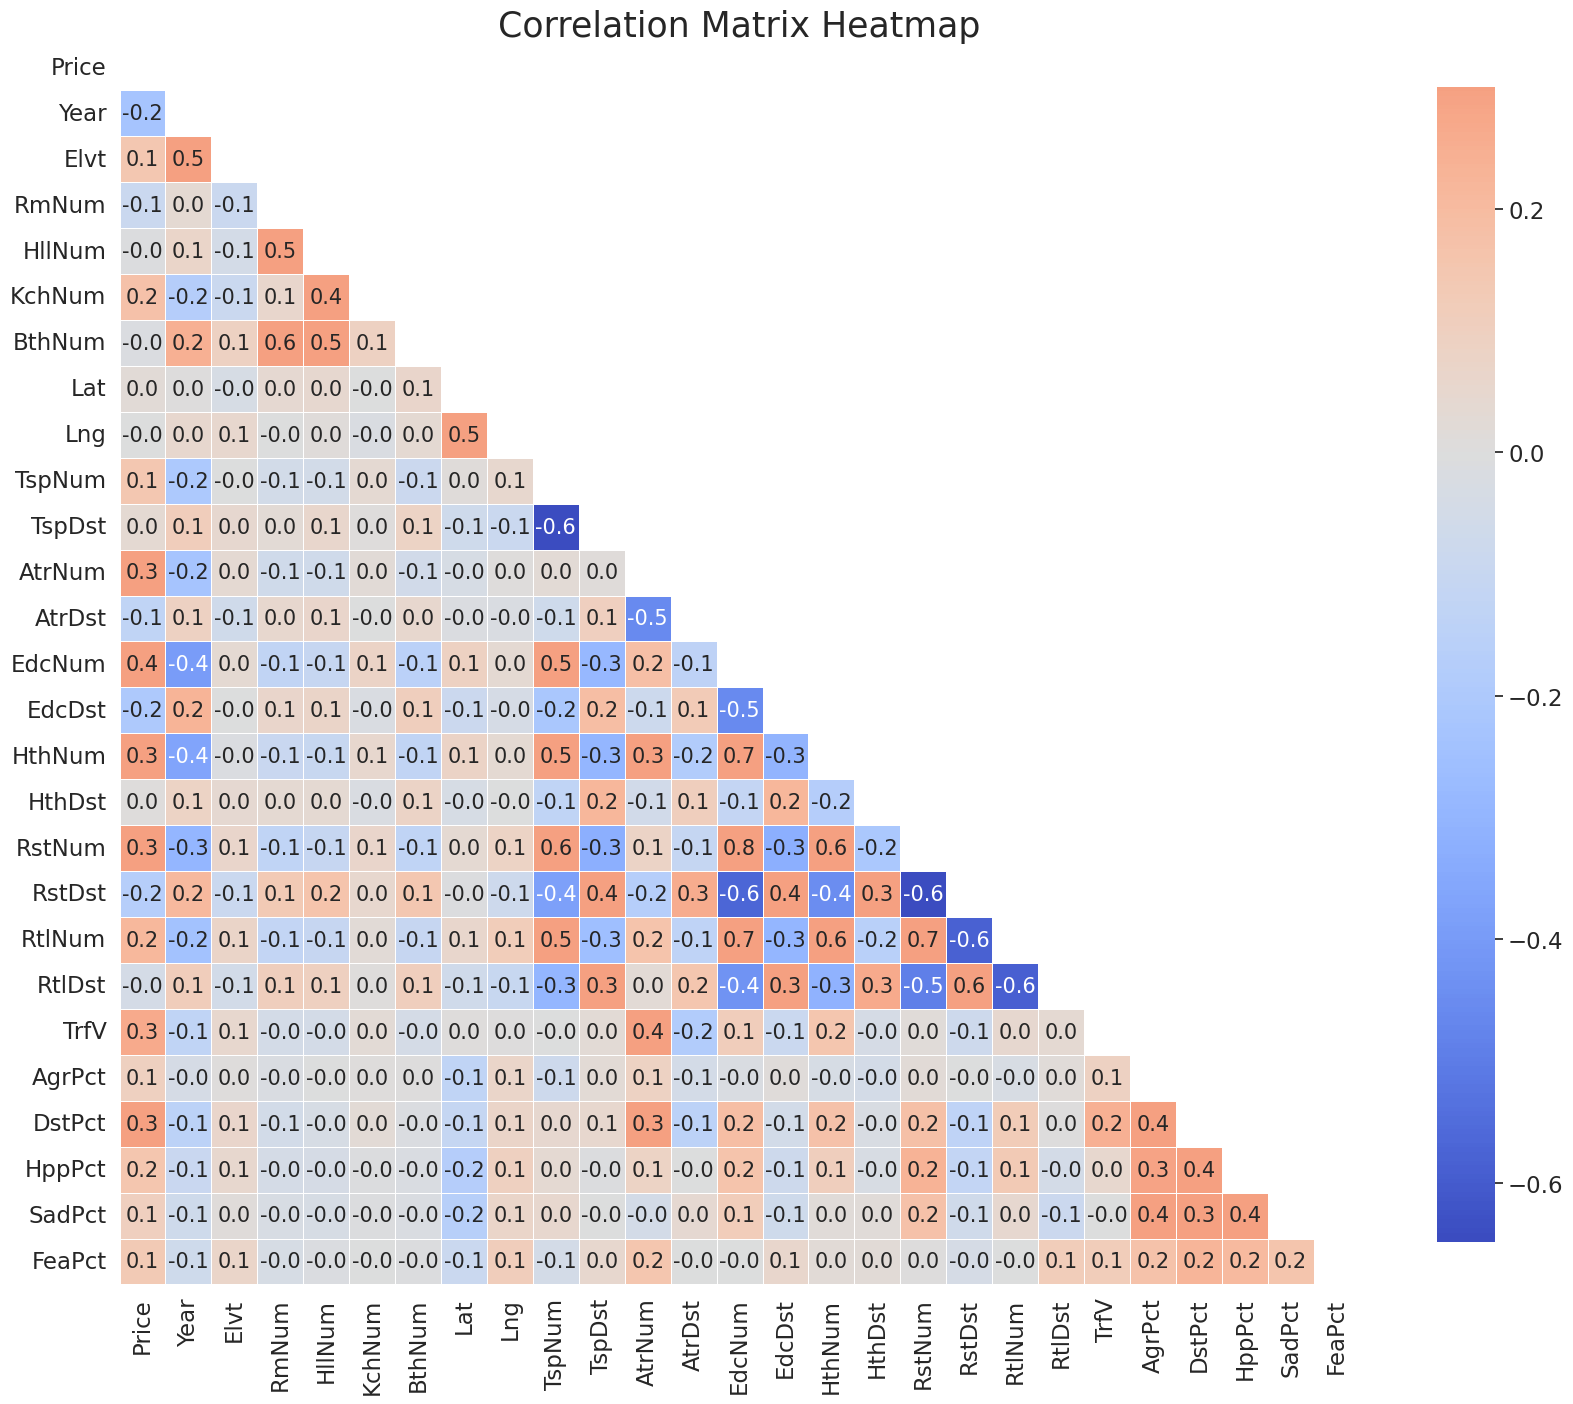

In [5]:
# Finding out the correlation between the features
corr = data.corr()

# Creating a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Setting up the matplotlib figure
plt.figure(figsize=(20, 20))

# Drawing the heatmap with the mask and correct aspect ratio
sns.set(font_scale=1.5, style='white')
sns.heatmap(corr,
            mask=mask,
            cmap='coolwarm',
            vmax=.3,
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .75},
            annot=True,
            fmt='.1f',
            annot_kws={'size': 15})

plt.title('Correlation Matrix Heatmap', fontsize=25)
plt.show()

# Outlier Detection in the H4M Dataset Using Z-scores

In the referenced study, "PATE: Property, Amenities, Traffic and Emotions Coming Together for Real Estate Price Prediction" by (Zhao et al.2022) [arXiv:2209.05471v2 [cs.CY]](https://doi.org/10.48550/arXiv.2209.05471), the authors opt to retain outliers in the data analysis. Similarly, in our exploration, we have decided to follow this methodology and keep the outliers. There are multiple reasons for this decision:

1. Nature of Real Estate Data: Real estate data is inherently diverse, and some outliers might represent unique properties that carry vital information about higher or lower price brackets.

2. Influential Data Points: In real estate, outliers can often be influential data points that contribute significantly to predictive modeling. Eliminating these can adversely impact the model's generalization on real-world data.

3. Comprehensive Analysis: To stay true to the nature of the dataset and the paper's methodology, it's imperative to include all data points, ensuring a comprehensive analysis.

4. Potential Value of Outliers: Outliers can sometimes indicate patterns or phenomena that would be missed if removed. They could represent luxury properties, historical homes, or other unique listings that are invaluable for analysis.

By maintaining the outliers, we aim to capture the full breadth of data variations, ensuring that the predictive model we develop is robust and versatile.

In [6]:
from scipy import stats

threshold = 3  # Threshold for Z-score, used in outlier detection

outliers_per_column = {}

# Looping through each column in the data
for column in data.columns:
    z_scores = stats.zscore(data[column])
    outliers = data[(z_scores < -threshold) | (z_scores > threshold)]
    num_outliers = outliers.shape[0]
    outliers_per_column[column] = num_outliers

print("Number of outliers per column:")
for column, num_outliers in outliers_per_column.items():
    print(f"{column}: {num_outliers}")

Number of outliers per column:
Price: 236
Year: 236
Elvt: 0
RmNum: 368
HllNum: 240
KchNum: 1132
BthNum: 210
Lat: 30
Lng: 25
TspNum: 0
TspDst: 233
AtrNum: 76
AtrDst: 5
EdcNum: 0
EdcDst: 239
HthNum: 263
HthDst: 827
RstNum: 614
RstDst: 421
RtlNum: 0
RtlDst: 207
TrfV: 83
AgrPct: 353
DstPct: 251
HppPct: 1425
SadPct: 1493
FeaPct: 168


# Comparative Analysis of Machine Learning Models for House Price Prediction

We separate the target variable, 'Price', from the independent variables in the H4M Dataset. To evaluate and compare the effectiveness of various machine learning models, the data is split into training and testing sets. This preparation sets the foundation for the subsequent model training and evaluation processes, aiming to discern patterns and relationships between diverse socio-economic factors influencing house prices.

In [7]:
from sklearn import metrics
# Spliting target variable and independent variables
X = data.drop(['Price'], axis = 1)
y = data['Price']

# Splitting into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

# DataFrame Initialization for Model Metrics

The provided code initializes an empty DataFrame named `model_metrics` with predefined columns. This DataFrame is designed to store performance metrics for various machine learning models across different datasets (e.g., training and testing).

In [8]:
# Creating an empty DataFrame to store the metrics for all models
model_metrics = pd.DataFrame(columns=['Data', 'Method', 'R^2', 'Adjusted R^2', 'MAE', 'MSE', 'RMSE'])

# Model 1 - Linear Regression Model Training and Evaluation

In [9]:
print('------------Linear Regression-----------------')

# Importing Linear Regressor
from sklearn.linear_model import LinearRegression

# Creating a Linear regressor
lm = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)

# Training the model using the training sets
lm.fit(X_train, y_train)

# Making model predictions on the train data
y_pred = lm.predict(X_train)

# Printing and computing metrics for training data
print("Metrics for Training Data")
print("-------------------------")
R2_train = round(metrics.r2_score(y_train, y_pred), 4)
print('R^2:', R2_train)
AdjR2_train = round(1 - (1-R2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1), 4)
print('Adjusted R^2:', AdjR2_train)
MAE_train = round(metrics.mean_absolute_error(y_train, y_pred))
print('MAE:', MAE_train)
MSE_train = round(metrics.mean_squared_error(y_train, y_pred))
print('MSE:', MSE_train)
RMSE_train = round(np.sqrt(MSE_train))
print('RMSE:', RMSE_train)
print("\n")

train_metrics = {
    'Data': 'Training set',
    'Method': 'Linear Regression',
    'R^2': R2_train,
    'Adjusted R^2': AdjR2_train,
    'MAE': MAE_train,
    'MSE': MSE_train,
    'RMSE': RMSE_train
}
model_metrics = pd.concat([model_metrics, pd.DataFrame([train_metrics])], ignore_index=True)

# Predicting Test data using the model
y_test_pred = lm.predict(X_test)

# Printing and computing metrics for test data
print("Metrics for Test Data")
print("---------------------")
R2_test = round(metrics.r2_score(y_test, y_test_pred), 4)
print('R^2:', R2_test)
AdjR2_test = round(1 - (1-R2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1), 4)
print('Adjusted R^2:', AdjR2_test)
MAE_test = round(metrics.mean_absolute_error(y_test, y_test_pred))
print('MAE:', MAE_test)
MSE_test = round(metrics.mean_squared_error(y_test, y_test_pred))
print('MSE:', MSE_test)
RMSE_test = round(np.sqrt(MSE_test))
print('RMSE:', RMSE_test)

test_metrics = {
    'Data': 'Testing set',
    'Method': 'Linear Regression',
    'R^2': R2_test,
    'Adjusted R^2': AdjR2_test,
    'MAE': MAE_test,
    'MSE': MSE_test,
    'RMSE': RMSE_test
}
model_metrics = pd.concat([model_metrics, pd.DataFrame([test_metrics])], ignore_index=True)

------------Linear Regression-----------------
Metrics for Training Data
-------------------------
R^2: 0.3797
Adjusted R^2: 0.3789
MAE: 15391
MSE: 411032381
RMSE: 20274


Metrics for Test Data
---------------------
R^2: 0.3651
Adjusted R^2: 0.3632
MAE: 15235
MSE: 402302484
RMSE: 20057


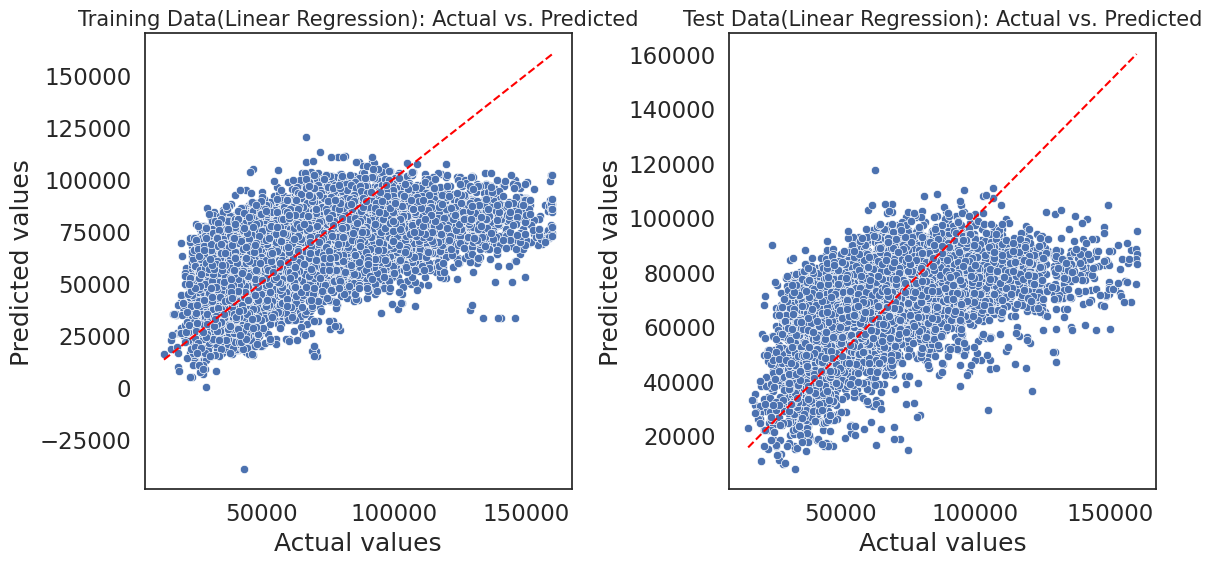

In [10]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(12, 6))

# Plotting for training data
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_pred)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.title('Training Data(Linear Regression): Actual vs. Predicted', fontsize=15)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

# Plotting for test data
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Test Data(Linear Regression): Actual vs. Predicted', fontsize=15)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.tight_layout()
plt.show()

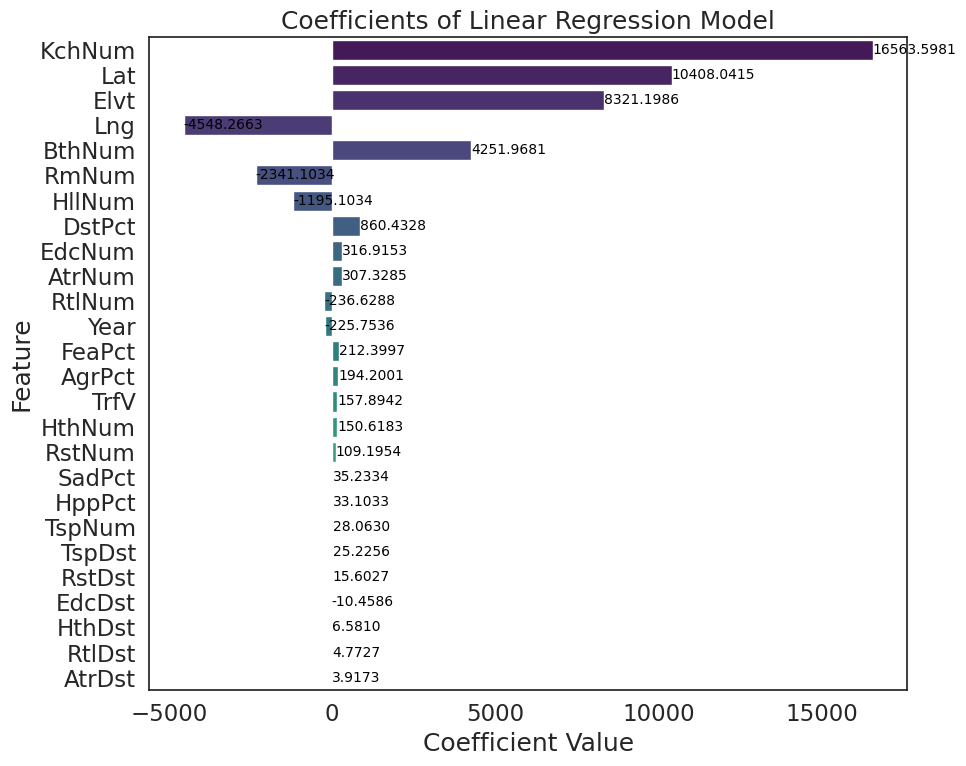

In [11]:
# Extracting the coefficients
coefficients = lm.coef_

# Creating a dataframe for coefficients
coeff_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})

# Sorting dataframe by the absolute value of coefficients
coeff_df = coeff_df.sort_values(by='Coefficient', key=abs, ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette="viridis")

# Annotating the coefficient values outside the bars
for i, v in enumerate(coeff_df['Coefficient']):
    plt.text(v, i, f"{v:.4f}", color='black', va='center', fontsize=10)

plt.title("Coefficients of Linear Regression Model")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Model 2 - XGBoost Regressor Model Training and Evaluation

In [12]:
print('------------XGBoost Regressor-----------------')

# Importing XGBoost Regressor
from xgboost import XGBRegressor

# Creating an XGBoost Regressor
xgboost_model = XGBRegressor()

# Training the model using the training sets
xgboost_model.fit(X_train, y_train)

# Making model predictions on the train data
y_pred = xgboost_model.predict(X_train)

# Printing and computing metrics for training data
print("Metrics for Training Data")
print("-------------------------")
R2_train_xgb = round(metrics.r2_score(y_train, y_pred), 4)
print('R^2:', R2_train_xgb)
AdjR2_train_xgb = round(1 - (1-R2_train_xgb)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1), 4)
print('Adjusted R^2:', AdjR2_train_xgb)
MAE_train_xgb = round(metrics.mean_absolute_error(y_train, y_pred))
print('MAE:', MAE_train_xgb)
MSE_train_xgb = round(metrics.mean_squared_error(y_train, y_pred))
print('MSE:', MSE_train_xgb)
RMSE_train_xgb = round(np.sqrt(MSE_train_xgb))
print('RMSE:', RMSE_train_xgb)
print("\n")  # Two new lines

train_metrics_xgb = {
    'Data': 'Training set',
    'Method': 'XGBoost Regressor',
    'R^2': R2_train_xgb,
    'Adjusted R^2': AdjR2_train_xgb,
    'MAE': MAE_train_xgb,
    'MSE': MSE_train_xgb,
    'RMSE': RMSE_train_xgb
}
model_metrics = pd.concat([model_metrics, pd.DataFrame([train_metrics_xgb])], ignore_index=True)

# Predicting Test data using the model
y_test_pred = xgboost_model.predict(X_test)

# Printing and computing metrics for test data
print("Metrics for Test Data")
print("---------------------")
R2_test_xgb = round(metrics.r2_score(y_test, y_test_pred), 4)
print('R^2:', R2_test_xgb)
AdjR2_test_xgb = round(1 - (1-R2_test_xgb)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1), 4)
print('Adjusted R^2:', AdjR2_test_xgb)
MAE_test_xgb = round(metrics.mean_absolute_error(y_test, y_test_pred))
print('MAE:', MAE_test_xgb)
MSE_test_xgb = round(metrics.mean_squared_error(y_test, y_test_pred))
print('MSE:', MSE_test_xgb)
RMSE_test_xgb = round(np.sqrt(MSE_test_xgb))
print('RMSE:', RMSE_test_xgb)

test_metrics_xgb = {
    'Data': 'Testing set',
    'Method': 'XGBoost Regressor',
    'R^2': R2_test_xgb,
    'Adjusted R^2': AdjR2_test_xgb,
    'MAE': MAE_test_xgb,
    'MSE': MSE_test_xgb,
    'RMSE': RMSE_test_xgb
}
model_metrics = pd.concat([model_metrics, pd.DataFrame([test_metrics_xgb])], ignore_index=True)

------------XGBoost Regressor-----------------
Metrics for Training Data
-------------------------
R^2: 0.9343
Adjusted R^2: 0.9342
MAE: 4387
MSE: 43549356
RMSE: 6599


Metrics for Test Data
---------------------
R^2: 0.877
Adjusted R^2: 0.8766
MAE: 5721
MSE: 77956264
RMSE: 8829


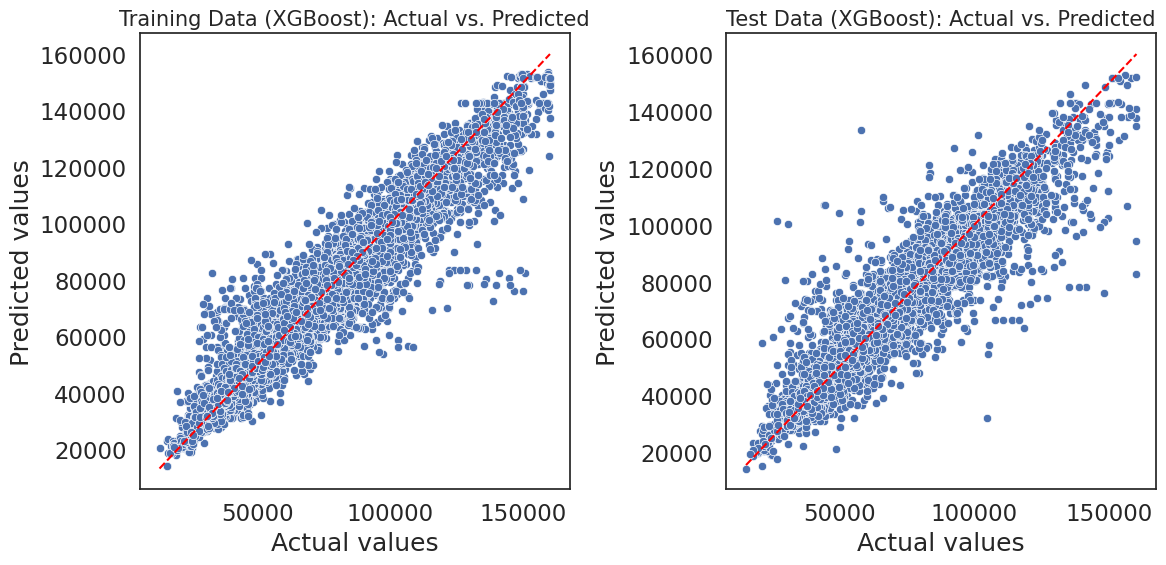

In [13]:
# Scatter plot of actual vs. predicted values for XGBoost Regressor
plt.figure(figsize=(12, 6))

# Plotting for training data
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_pred)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.title('Training Data (XGBoost): Actual vs. Predicted', fontsize=15)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

# Plotting for test data
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Test Data (XGBoost): Actual vs. Predicted', fontsize=15)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.tight_layout()
plt.show()

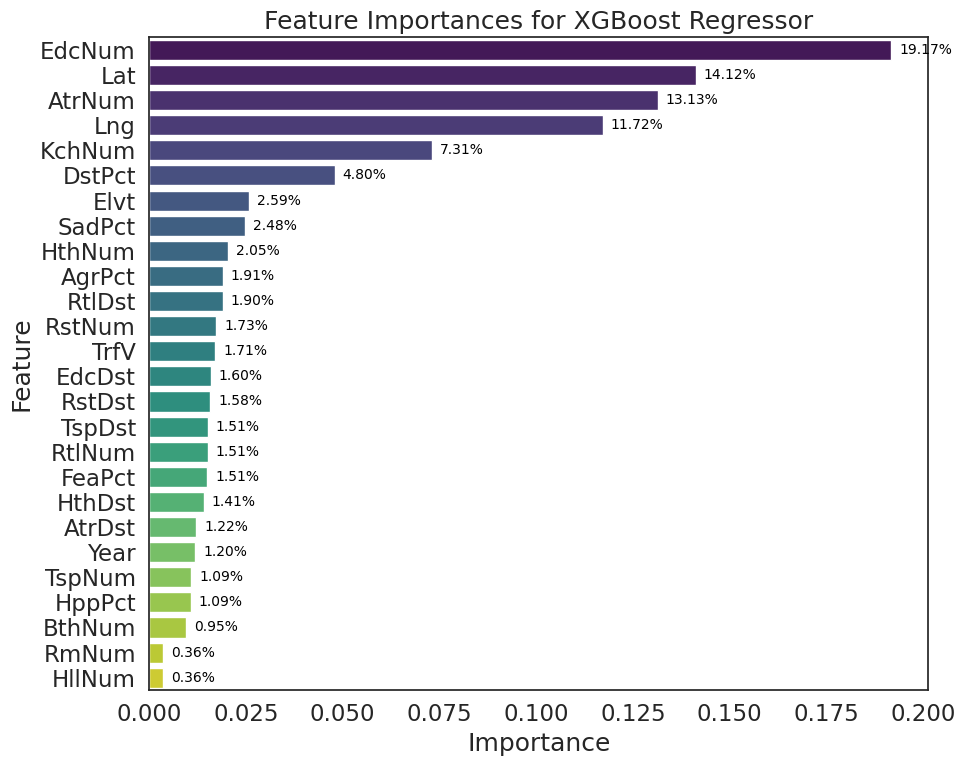

In [14]:
# Getting feature importances
feature_importances_xgb = xgboost_model.feature_importances_

# Converting feature names and their importance scores into a dataframe
features_df_xgb = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances_xgb
})

# Sorting the dataframe based on importance scores
features_df_xgb = features_df_xgb.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=features_df_xgb, palette="viridis")

# Annotating the importance percentages outside the bars
for i, v in enumerate(features_df_xgb['Importance']):
    percentage = v * 100
    plt.text(v + 0.002, i, f"{percentage:.2f}%", color='black', va='center', fontsize=10)

plt.title("Feature Importances for XGBoost Regressor")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Model 3 - AdaBoost Regressor Model Training and Evaluation

In [15]:
print('------------AdaBoost Regressor-----------------')

# Importing AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor

# Creating an AdaBoost Regressor
adaboost_model = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Training the model using the training sets
adaboost_model.fit(X_train, y_train)

# Making model predictions on the train data
y_pred = adaboost_model.predict(X_train)

# Printing and computing metrics for training data
print("Metrics for Training Data")
print("-------------------------")
R2_train_ada = round(metrics.r2_score(y_train, y_pred), 4)
print('R^2:', R2_train_ada)
AdjR2_train_ada = round(1 - (1-R2_train_ada)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1), 4)
print('Adjusted R^2:', AdjR2_train_ada)
MAE_train_ada = round(metrics.mean_absolute_error(y_train, y_pred))
print('MAE:', MAE_train_ada)
MSE_train_ada = round(metrics.mean_squared_error(y_train, y_pred))
print('MSE:', MSE_train_ada)
RMSE_train_ada = round(np.sqrt(MSE_train_ada))
print('RMSE:', RMSE_train_ada)
print("\n")  # Two new lines

train_metrics_ada = {
    'Data': 'Training set',
    'Method': 'AdaBoost Regressor',
    'R^2': R2_train_ada,
    'Adjusted R^2': AdjR2_train_ada,
    'MAE': MAE_train_ada,
    'MSE': MSE_train_ada,
    'RMSE': RMSE_train_ada
}
model_metrics = pd.concat([model_metrics, pd.DataFrame([train_metrics_ada])], ignore_index=True)

# Predicting Test data using the model
y_test_pred = adaboost_model.predict(X_test)

# Printing and computing metrics for test data
print("Metrics for Test Data")
print("---------------------")
R2_test_ada = round(metrics.r2_score(y_test, y_test_pred), 4)
print('R^2:', R2_test_ada)
AdjR2_test_ada = round(1 - (1-R2_test_ada)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1), 4)
print('Adjusted R^2:', AdjR2_test_ada)
MAE_test_ada = round(metrics.mean_absolute_error(y_test, y_test_pred))
print('MAE:', MAE_test_ada)
MSE_test_ada = round(metrics.mean_squared_error(y_test, y_test_pred))
print('MSE:', MSE_test_ada)
RMSE_test_ada = round(np.sqrt(MSE_test_ada))
print('RMSE:', RMSE_test_ada)

test_metrics_ada = {
    'Data': 'Testing set',
    'Method': 'AdaBoost Regressor',
    'R^2': R2_test_ada,
    'Adjusted R^2': AdjR2_test_ada,
    'MAE': MAE_test_ada,
    'MSE': MSE_test_ada,
    'RMSE': RMSE_test_ada
}
model_metrics = pd.concat([model_metrics, pd.DataFrame([test_metrics_ada])], ignore_index=True)

------------AdaBoost Regressor-----------------
Metrics for Training Data
-------------------------
R^2: 0.4844
Adjusted R^2: 0.4837
MAE: 14690
MSE: 341653956
RMSE: 18484


Metrics for Test Data
---------------------
R^2: 0.4647
Adjusted R^2: 0.4631
MAE: 14789
MSE: 339217236
RMSE: 18418


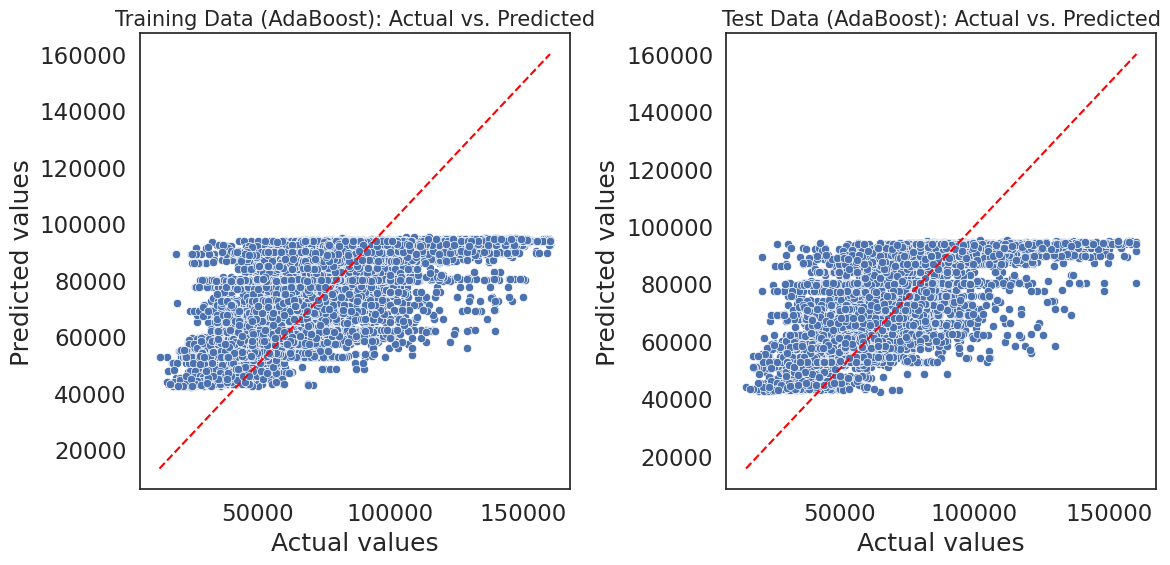

In [16]:
# Scatter plot of actual vs. predicted values for AdaBoost Regressor
plt.figure(figsize=(12, 6))

# Plotting for training data
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_pred)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.title('Training Data (AdaBoost): Actual vs. Predicted', fontsize=15)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

# Plotting for test data
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Test Data (AdaBoost): Actual vs. Predicted', fontsize=15)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.tight_layout()
plt.show()

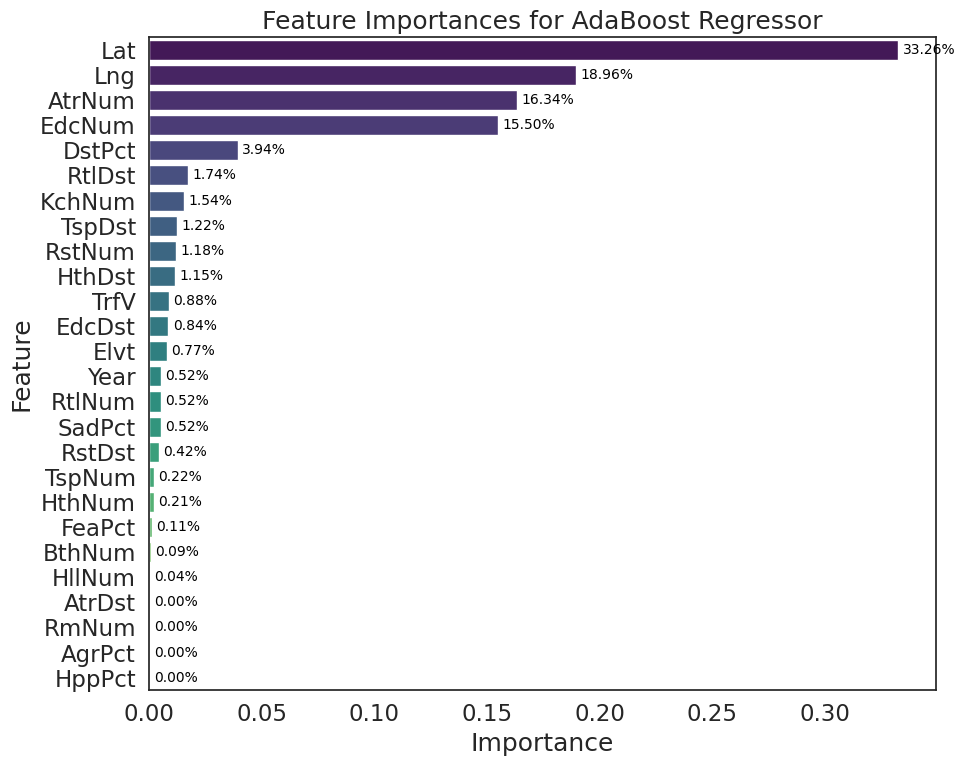

In [17]:
# Getting feature importances
feature_importances_ada = adaboost_model.feature_importances_

# Converting feature names and their importance scores into a dataframe
features_df_ada = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances_ada
})

# Sorting the dataframe based on importance scores
features_df_ada = features_df_ada.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=features_df_ada, palette="viridis")

# Annotating the importance percentages outside the bars
for i, v in enumerate(features_df_ada['Importance']):
    percentage = v * 100
    plt.text(v + 0.002, i, f"{percentage:.2f}%", color='black', va='center', fontsize=10)

plt.title("Feature Importances for AdaBoost Regressor")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Model 4 - CatBoost Regressor Model Training and Evaluation

In [18]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.7 MB/s eta 0:00:00


In [19]:
print('------------CatBoost Regressor-----------------')

# Importing CatBoost Regressor
from catboost import CatBoostRegressor

# Creating a CatBoost Regressor
catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, verbose=0, random_seed=42)

# Training the model using the training sets
catboost_model.fit(X_train, y_train)

# Making model predictions on the train data
y_pred = catboost_model.predict(X_train)

# Printing and computing metrics for training data
print("Metrics for Training Data")
print("-------------------------")
R2_train_cat = round(metrics.r2_score(y_train, y_pred), 4)
print('R^2:', R2_train_cat)
AdjR2_train_cat = round(1 - (1-R2_train_cat)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1), 4)
print('Adjusted R^2:', AdjR2_train_cat)
MAE_train_cat = round(metrics.mean_absolute_error(y_train, y_pred))
print('MAE:', MAE_train_cat)
MSE_train_cat = round(metrics.mean_squared_error(y_train, y_pred))
print('MSE:', MSE_train_cat)
RMSE_train_cat = round(np.sqrt(MSE_train_cat))
print('RMSE:', RMSE_train_cat)
print("\n")  # Two new lines

train_metrics_cat = {
    'Data': 'Training set',
    'Method': 'CatBoost Regressor',
    'R^2': R2_train_cat,
    'Adjusted R^2': AdjR2_train_cat,
    'MAE': MAE_train_cat,
    'MSE': MSE_train_cat,
    'RMSE': RMSE_train_cat
}
model_metrics = pd.concat([model_metrics, pd.DataFrame([train_metrics_cat])], ignore_index=True)

# Predicting Test data using the model
y_test_pred = catboost_model.predict(X_test)

# Printing and computing metrics for test data
print("Metrics for Test Data")
print("---------------------")
R2_test_cat = round(metrics.r2_score(y_test, y_test_pred), 4)
print('R^2:', R2_test_cat)
AdjR2_test_cat = round(1 - (1-R2_test_cat)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1), 4)
print('Adjusted R^2:', AdjR2_test_cat)
MAE_test_cat = round(metrics.mean_absolute_error(y_test, y_test_pred))
print('MAE:', MAE_test_cat)
MSE_test_cat = round(metrics.mean_squared_error(y_test, y_test_pred))
print('MSE:', MSE_test_cat)
RMSE_test_cat = round(np.sqrt(MSE_test_cat))
print('RMSE:', RMSE_test_cat)

test_metrics_cat = {
    'Data': 'Testing set',
    'Method': 'CatBoost Regressor',
    'R^2': R2_test_cat,
    'Adjusted R^2': AdjR2_test_cat,
    'MAE': MAE_test_cat,
    'MSE': MSE_test_cat,
    'RMSE': RMSE_test_cat
}
model_metrics = pd.concat([model_metrics, pd.DataFrame([test_metrics_cat])], ignore_index=True)

------------CatBoost Regressor-----------------
Metrics for Training Data
-------------------------
R^2: 0.9282
Adjusted R^2: 0.9281
MAE: 4589
MSE: 47554169
RMSE: 6896


Metrics for Test Data
---------------------
R^2: 0.8778
Adjusted R^2: 0.8774
MAE: 5718
MSE: 77455852
RMSE: 8801


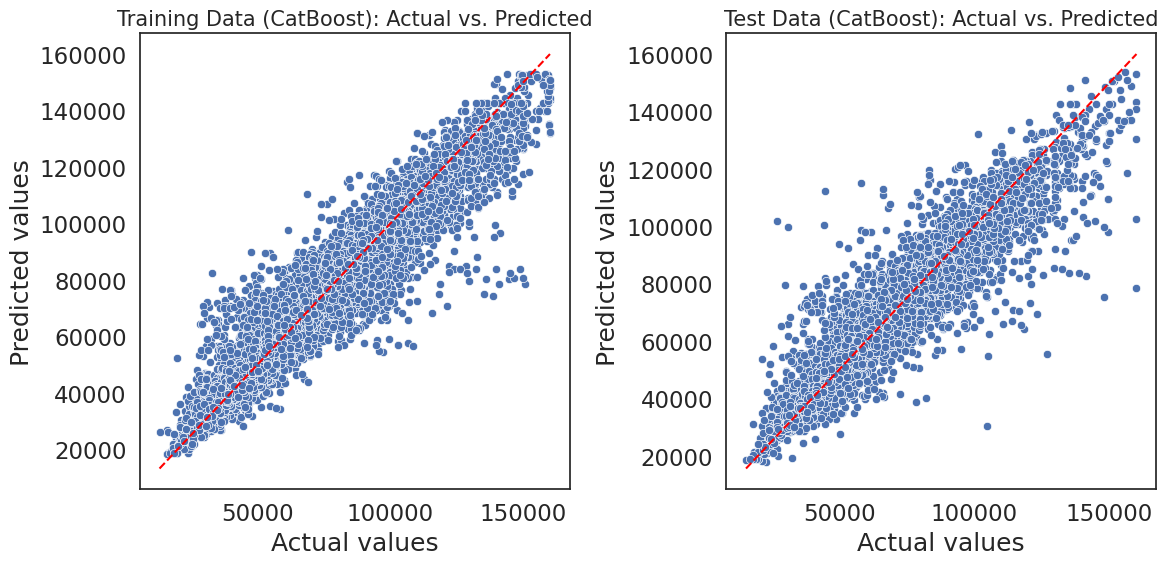

In [20]:
# Scatter plot of actual vs. predicted values for CatBoost Regressor
plt.figure(figsize=(12, 6))

# Plotting for training data
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_pred)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.title('Training Data (CatBoost): Actual vs. Predicted', fontsize=15)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

# Plotting for test data
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Test Data (CatBoost): Actual vs. Predicted', fontsize=15)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.tight_layout()
plt.show()

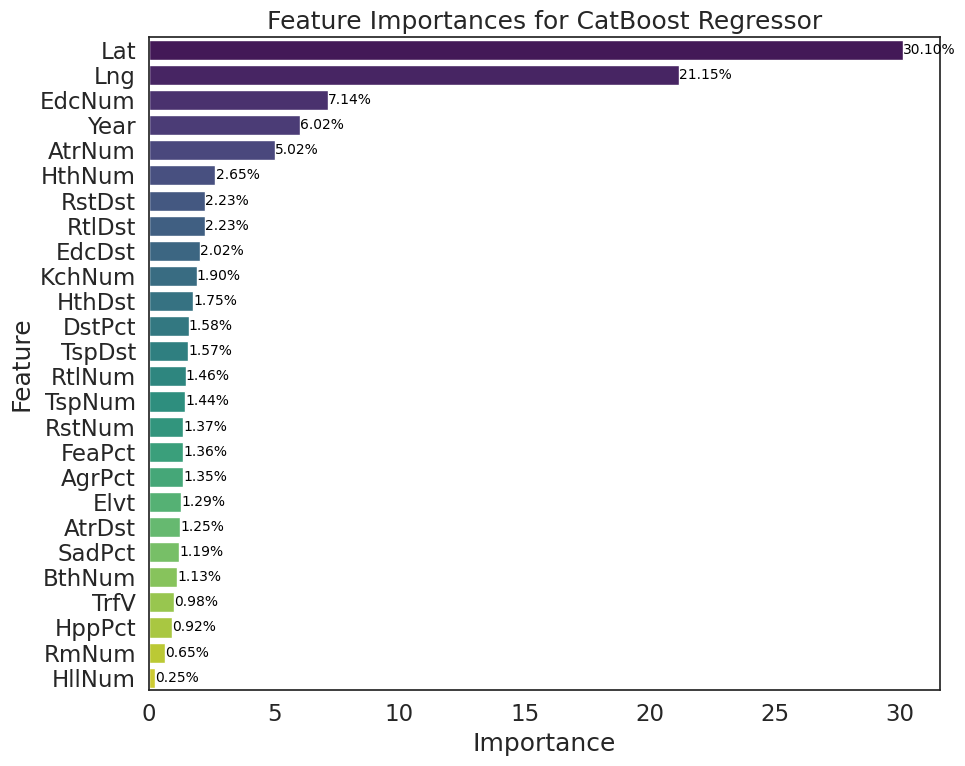

In [21]:
# Getting feature importances
feature_importances_cat = catboost_model.get_feature_importance()

# Converting feature names and their importance scores into a dataframe
features_df_cat = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances_cat
})

# Sorting the dataframe based on importance scores
features_df_cat = features_df_cat.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=features_df_cat, palette="viridis")

# Annotating the importance percentages outside the bars
for i, v in enumerate(features_df_cat['Importance']):
    plt.text(v + 0.002, i, f"{v:.2f}%", color='black', va='center', fontsize=10)

plt.title("Feature Importances for CatBoost Regressor")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Model 5 - Random Forest Regressor Model Training and Evaluation

In [22]:
print('------------Random Forest Regressor-----------------')

# Importing library for Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Creating a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model using the training sets
rf.fit(X_train, y_train)

# Making model predictions on the train data
y_pred = rf.predict(X_train)

# Printing and computing metrics for training data
print("Metrics for Training Data")
print("-------------------------")
R2_train_rf = round(metrics.r2_score(y_train, y_pred), 4)
print('R^2:', R2_train_rf)
AdjR2_train_rf = round(1 - (1-R2_train_rf)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1), 4)
print('Adjusted R^2:', AdjR2_train_rf)
MAE_train_rf = round(metrics.mean_absolute_error(y_train, y_pred))
print('MAE:', MAE_train_rf)
MSE_train_rf = round(metrics.mean_squared_error(y_train, y_pred))
print('MSE:', MSE_train_rf)
RMSE_train_rf = round(np.sqrt(MSE_train_rf))
print('RMSE:', RMSE_train_rf)
print("\n")  # Two new lines

train_metrics_rf = {
    'Data': 'Training set',
    'Method': 'Random Forest Regressor',
    'R^2': R2_train_rf,
    'Adjusted R^2': AdjR2_train_rf,
    'MAE': MAE_train_rf,
    'MSE': MSE_train_rf,
    'RMSE': RMSE_train_rf
}
model_metrics = pd.concat([model_metrics, pd.DataFrame([train_metrics_rf])], ignore_index=True)

# Predicting Test data using the model
y_test_pred = rf.predict(X_test)

# Printing and computing metrics for test data
print("Metrics for Test Data")
print("---------------------")
R2_test_rf = round(metrics.r2_score(y_test, y_test_pred), 4)
print('R^2:', R2_test_rf)
AdjR2_test_rf = round(1 - (1-R2_test_rf)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1), 4)
print('Adjusted R^2:', AdjR2_test_rf)
MAE_test_rf = round(metrics.mean_absolute_error(y_test, y_test_pred))
print('MAE:', MAE_test_rf)
MSE_test_rf = round(metrics.mean_squared_error(y_test, y_test_pred))
print('MSE:', MSE_test_rf)
RMSE_test_rf = round(np.sqrt(MSE_test_rf))
print('RMSE:', RMSE_test_rf)

test_metrics_rf = {
    'Data': 'Testing set',
    'Method': 'Random Forest Regressor',
    'R^2': R2_test_rf,
    'Adjusted R^2': AdjR2_test_rf,
    'MAE': MAE_test_rf,
    'MSE': MSE_test_rf,
    'RMSE': RMSE_test_rf
}
model_metrics = pd.concat([model_metrics, pd.DataFrame([test_metrics_rf])], ignore_index=True)

------------Random Forest Regressor-----------------
Metrics for Training Data
-------------------------
R^2: 0.9726
Adjusted R^2: 0.9726
MAE: 2449
MSE: 18125790
RMSE: 4257


Metrics for Test Data
---------------------
R^2: 0.8937
Adjusted R^2: 0.8934
MAE: 4931
MSE: 67333749
RMSE: 8206


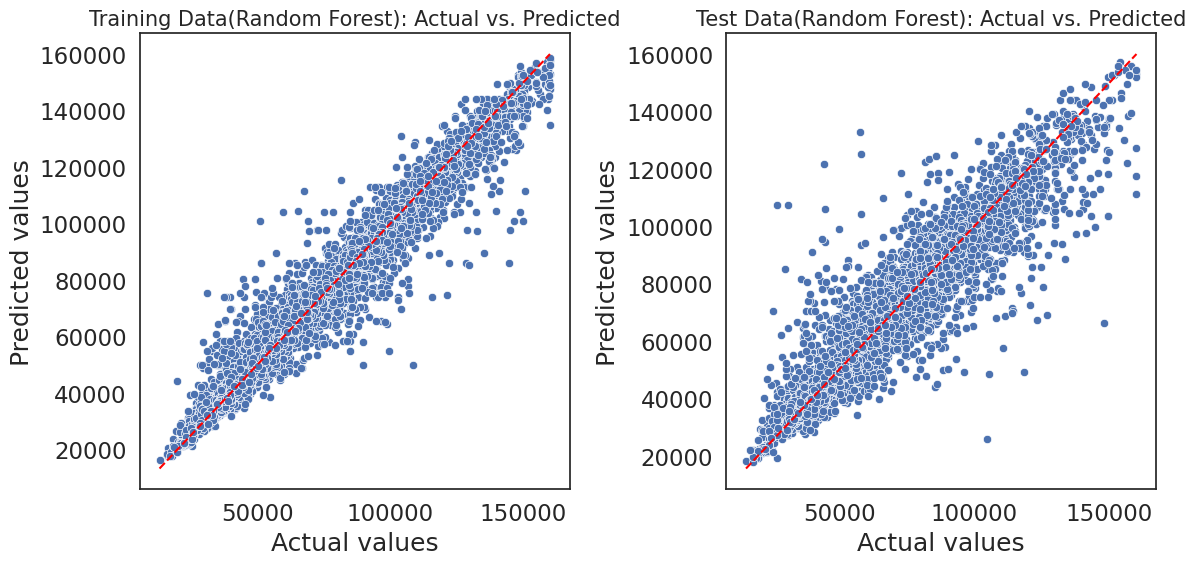

In [23]:
# Scatter plot of actual vs. predicted values for Random Forest Regressor
plt.figure(figsize=(12, 6))

# Plotting for training data
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_pred)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.title('Training Data(Random Forest): Actual vs. Predicted', fontsize=15)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

# Plotting for test data
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Test Data(Random Forest): Actual vs. Predicted', fontsize=15)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.tight_layout()
plt.show()

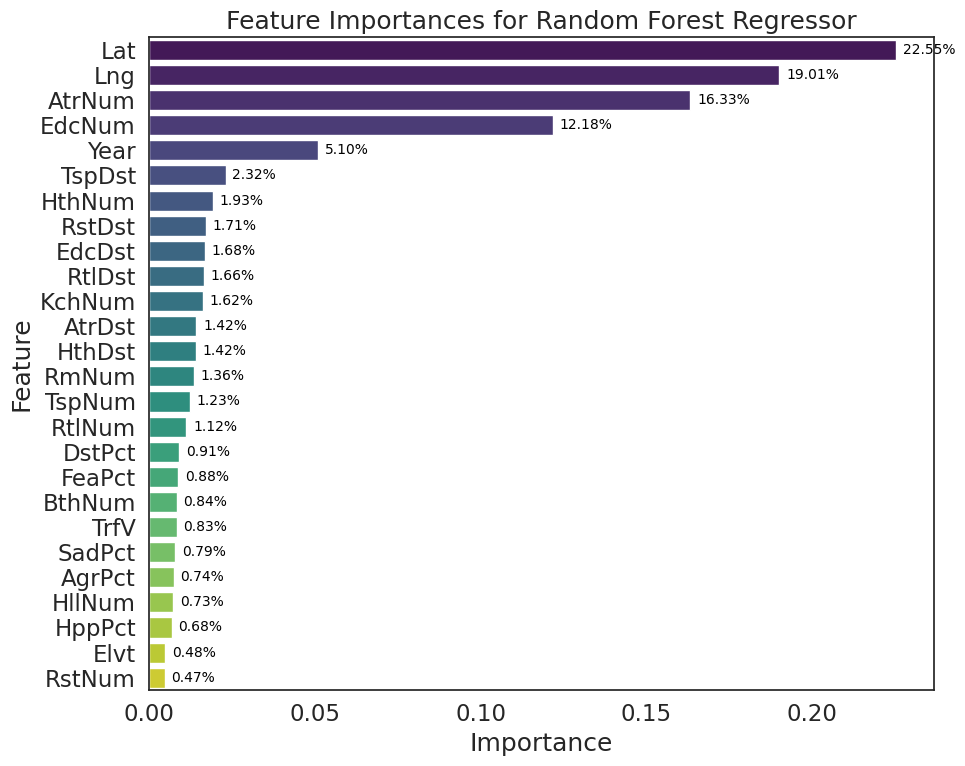

In [24]:
# Getting feature importances and converting Random Forest feature names and their importance scores into a dataframe
features_df_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
})

# Sorting the dataframe based on importance scores
features_df_rf = features_df_rf.sort_values(by='Importance', ascending=False)

# Plotting the feature importances for Random Forest
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=features_df_rf, palette="viridis")

# Annotating the importance percentages outside the bars
for i, v in enumerate(features_df_rf['Importance']):
    percentage = v * 100
    plt.text(v + 0.002, i, f"{percentage:.2f}%", color='black', va='center', fontsize=10)

plt.title("Feature Importances for Random Forest Regressor")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


# Model 6 - K-Nearest Neighbors Regressor Model Training and Evaluation

In [25]:
print('------------K-Nearest Neighbors Regressor-----------------')

# Importing K-Nearest Neighbors Regressor
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_error

# Performing cross-validation to find the optimal number of neighbors
max_k = 10  # Define a maximum for k to test up to.
cv_scores = []

# Using mean squared error as the metric. Since it's a loss, we want to minimize it.
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

for k in range(1, max_k+1):
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring=mse_scorer)
    cv_scores.append(-1 * scores.mean())  # Negate because we negated the MSE for maximization

# Finding the optimal k value
optimal_k = np.argmin(cv_scores) + 1  # +1 because index starts from 0

print(f"The optimal number of neighbors is {optimal_k}")

# Training and evaluating the KNN regressor with the optimal number of neighbors
knn_optimal = KNeighborsRegressor(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)
y_pred = knn_optimal.predict(X_train)
y_test_pred = knn_optimal.predict(X_test)
# Computing metrics for training data
R2_train_knn = round(r2_score(y_train, y_pred), 4)
AdjR2_train_knn = round(1 - (1-R2_train_knn)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1), 4)
MAE_train_knn = round(mean_absolute_error(y_train, y_pred))
MSE_train_knn = round(mean_squared_error(y_train, y_pred))
RMSE_train_knn = round(np.sqrt(MSE_train_knn))
# Printing metrics for training data
print("Metrics for Training Data")
print("-------------------------")
print('R^2:', R2_train_knn)
print('Adjusted R^2:', AdjR2_train_knn)
print('MAE:', MAE_train_knn)
print('MSE:', MSE_train_knn)
print('RMSE:', RMSE_train_knn)
print("\n")  # Two new lines
train_metrics_knn = {
    'Data': 'Training set',
    'Method': 'K-Nearest Neighbors Regressor',
    'R^2': R2_train_knn,
    'Adjusted R^2': AdjR2_train_knn,
    'MAE': MAE_train_knn,
    'MSE': MSE_train_knn,
    'RMSE': RMSE_train_knn
}

# Appending to model metrics dataframe
model_metrics = pd.concat([model_metrics, pd.DataFrame([train_metrics_knn])], ignore_index=True)

# Computing metrics for test data
R2_test_knn = round(r2_score(y_test, y_test_pred), 4)
AdjR2_test_knn = round(1 - (1-R2_test_knn)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1), 4)
MAE_test_knn = round(mean_absolute_error(y_test, y_test_pred))
MSE_test_knn = round(mean_squared_error(y_test, y_test_pred))
RMSE_test_knn = round(np.sqrt(MSE_test_knn))
# Printing metrics for test data
print("Metrics for Test Data")
print("---------------------")
print('R^2:', R2_test_knn)
print('Adjusted R^2:', AdjR2_test_knn)
print('MAE:', MAE_test_knn)
print('MSE:', MSE_test_knn)
print('RMSE:', RMSE_test_knn)
test_metrics_knn = {
    'Data': 'Testing set',
    'Method': 'K-Nearest Neighbors Regressor',
    'R^2': R2_test_knn,
    'Adjusted R^2': AdjR2_test_knn,
    'MAE': MAE_test_knn,
    'MSE': MSE_test_knn,
    'RMSE': RMSE_test_knn
}

# Appending to model metrics dataframe
model_metrics = pd.concat([model_metrics, pd.DataFrame([test_metrics_knn])], ignore_index=True)

------------K-Nearest Neighbors Regressor-----------------
The optimal number of neighbors is 2
Metrics for Training Data
-------------------------
R^2: 0.9438
Adjusted R^2: 0.9437
MAE: 3326
MSE: 37247278
RMSE: 6103


Metrics for Test Data
---------------------
R^2: 0.8066
Adjusted R^2: 0.806
MAE: 6276
MSE: 122545585
RMSE: 11070


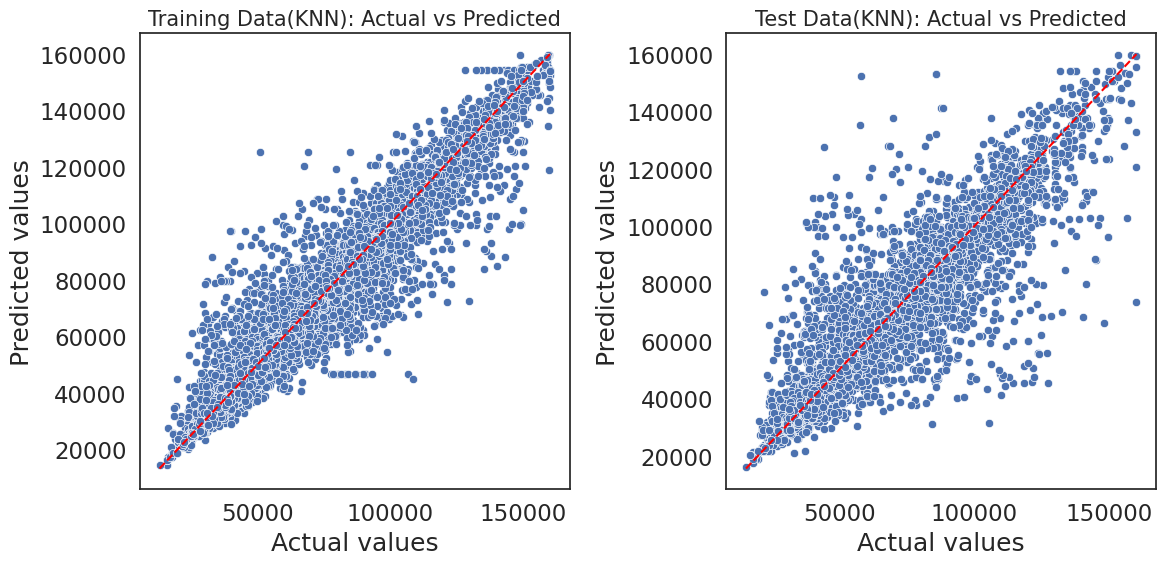

In [26]:
# Scatter plot of actual vs. predicted values for K-Nearest Neighbors Regressor
plt.figure(figsize=(12, 6))

# Plotting for training data
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_pred)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.title('Training Data(KNN): Actual vs Predicted', fontsize=15)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

# Plotting for test data
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Test Data(KNN): Actual vs Predicted', fontsize=15)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.tight_layout()
plt.show()

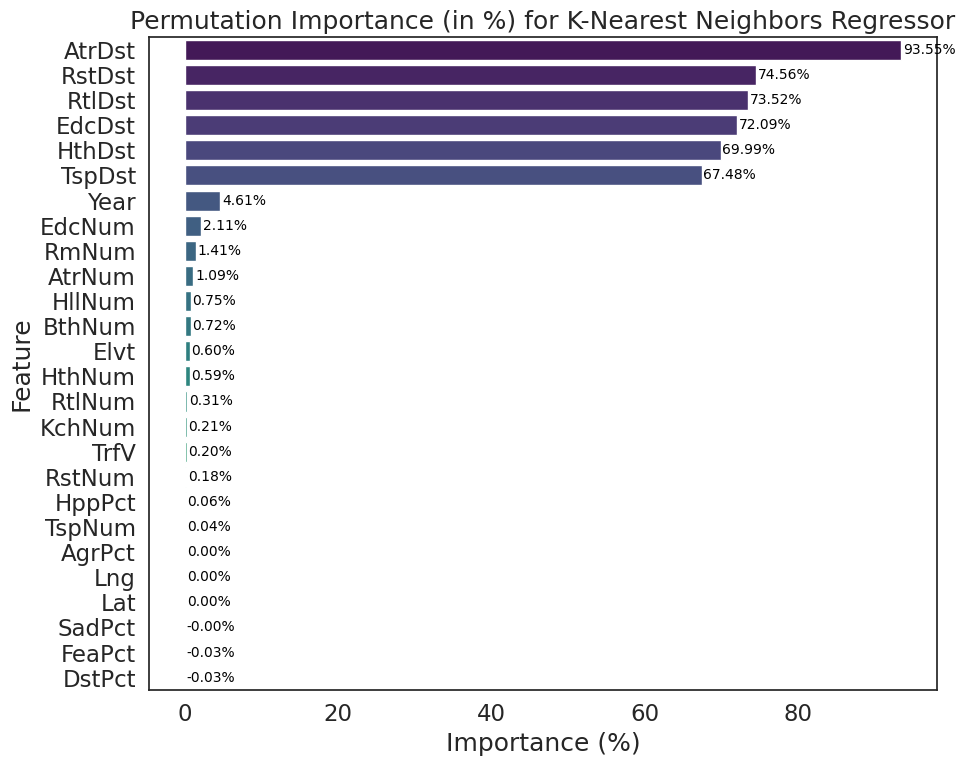

In [27]:
from sklearn.inspection import permutation_importance

# Calculating permutation importance for the KNN regressor
perm_importance = permutation_importance(knn_optimal, X_test, y_test)

# Converting feature names and their importance scores into a dataframe
features_df_knn = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': perm_importance.importances_mean
})

# Converting the raw importance values to percentages
features_df_knn['Importance'] = features_df_knn['Importance'] * 100

# Sorting the dataframe based on importance scores
features_df_knn = features_df_knn.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=features_df_knn, palette="viridis")

# Annotating the importance values outside the bars
for i, v in enumerate(features_df_knn['Importance']):
    plt.text(v + 0.2, i, f"{v:.2f}%", color='black', va='center', fontsize=10)  # Adjusted the text placement

plt.title("Permutation Importance (in %) for K-Nearest Neighbors Regressor")
plt.xlabel("Importance (%)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Model 7 - Multi-layer Perceptron Neural Network Model Training and Evaluation

In [28]:
# Importing necessary libraries for the MLP Neural Network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
from tensorflow.keras.callbacks import LambdaCallback

# Scaling the features
X_scaler = StandardScaler()
X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Scaling the target
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1)).flatten()

# Building the Neural Network
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],),
                 kernel_regularizer=keras.regularizers.l2(0.001)),  # L2 regularization
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Single output for regression
])

# Adjusting the learning rate using Adam Optimizer
optimizer = keras.optimizers.Adam(learning_rate=0.0005)

model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

print_callback = LambdaCallback(
    on_epoch_end=lambda epoch, logs: (
        print(f"Epoch {epoch+1} - Train loss: {logs['loss']:.4f}, Val loss: {logs['val_loss']:.4f}")
        if (epoch + 1) % 10 == 0 else None
    )
)

history = model.fit(
    X_train_scaled, y_train_scaled,  # Using scaled target for training
    epochs=100,
    validation_split=0.2,
    batch_size=32,
    verbose=0,  # Setting verbose to 0 to suppress the default printing
    callbacks=[print_callback]  # Adding the callback here
)

# Evaluating the model
loss, mae = model.evaluate(X_test_scaled, y_test_scaled, verbose=1)

# Making predictions on the training dataset
y_train_pred_scaled = model.predict(X_train_scaled)
y_train_pred = y_scaler.inverse_transform(y_train_pred_scaled)


# Calculating metrics for training data
r2_train = round(r2_score(y_train, y_train_pred), 4)
adjusted_r2_train = round(1 - (1-r2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1), 4)
mae_train = round(mean_absolute_error(y_train, y_train_pred))
mse_train = round(mean_squared_error(y_train, y_train_pred))
rmse_train = round(np.sqrt(mse_train))

# Printing metrics for training data
print("Metrics for Training Data")
print("-------------------------")
print('R^2:', r2_train)
print('Adjusted R^2:', adjusted_r2_train)
print('MAE:', mae_train)
print('MSE:', mse_train)
print('RMSE:', rmse_train)

# Appending to model metrics dataframe
train_metrics_nn = {
    'Data': 'Training set',
    'Method': 'Neural Network',
    'R^2': r2_train,
    'Adjusted R^2': adjusted_r2_train,
    'MAE': mae_train,
    'MSE': mse_train,
    'RMSE': rmse_train
}
model_metrics = pd.concat([model_metrics, pd.DataFrame([train_metrics_nn])], ignore_index=True)

# Making predictions on the test dataset
y_pred_scaled = model.predict(X_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled)

# Calculating metrics for test data
r2_test = round(r2_score(y_test, y_pred), 4)
adjusted_r2_test = round(1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1), 4)
mae_test = round(mean_absolute_error(y_test, y_pred))
mse_test = round(mean_squared_error(y_test, y_pred))
rmse_test = round(np.sqrt(mse_test))

# Printing metrics for test data
print("Metrics for Test Data")
print("---------------------")
print('R^2:', r2_test)
print('Adjusted R^2:', adjusted_r2_test)
print('MAE:', mae_test)
print('MSE:', mse_test)
print('RMSE:', rmse_test)

# Appending to model metrics dataframe
test_metrics_nn = {
    'Data': 'Testing set',
    'Method': 'Neural Network',
    'R^2': r2_test,
    'Adjusted R^2': adjusted_r2_test,
    'MAE': mae_test,
    'MSE': mse_test,
    'RMSE': rmse_test
}
model_metrics = pd.concat([model_metrics, pd.DataFrame([test_metrics_nn])], ignore_index=True)

Epoch 10 - Train loss: 0.4080, Val loss: 0.3605
Epoch 20 - Train loss: 0.2820, Val loss: 0.2653
Epoch 30 - Train loss: 0.2491, Val loss: 0.2310
Epoch 40 - Train loss: 0.2305, Val loss: 0.2148
Epoch 50 - Train loss: 0.2200, Val loss: 0.2058
Epoch 60 - Train loss: 0.2204, Val loss: 0.2072
Epoch 70 - Train loss: 0.2137, Val loss: 0.1997
Epoch 80 - Train loss: 0.2129, Val loss: 0.2025
Epoch 90 - Train loss: 0.2101, Val loss: 0.1999
Epoch 100 - Train loss: 0.2080, Val loss: 0.2065
625/625 [==============================] - 1s 1ms/step
Metrics for Training Data
-------------------------
R^2: 0.8795
Adjusted R^2: 0.8793
MAE: 6158
MSE: 79869584
RMSE: 8937
268/268 [==============================] - 0s 1ms/step
Metrics for Test Data
---------------------
R^2: 0.8296
Adjusted R^2: 0.8291
MAE: 7013
MSE: 107952599
RMSE: 10390


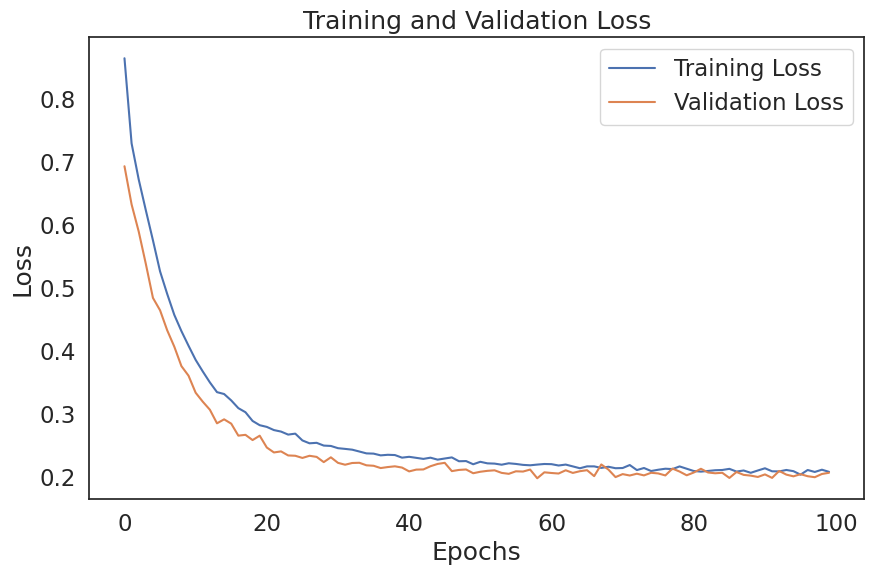

In [29]:
# Visualizing training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

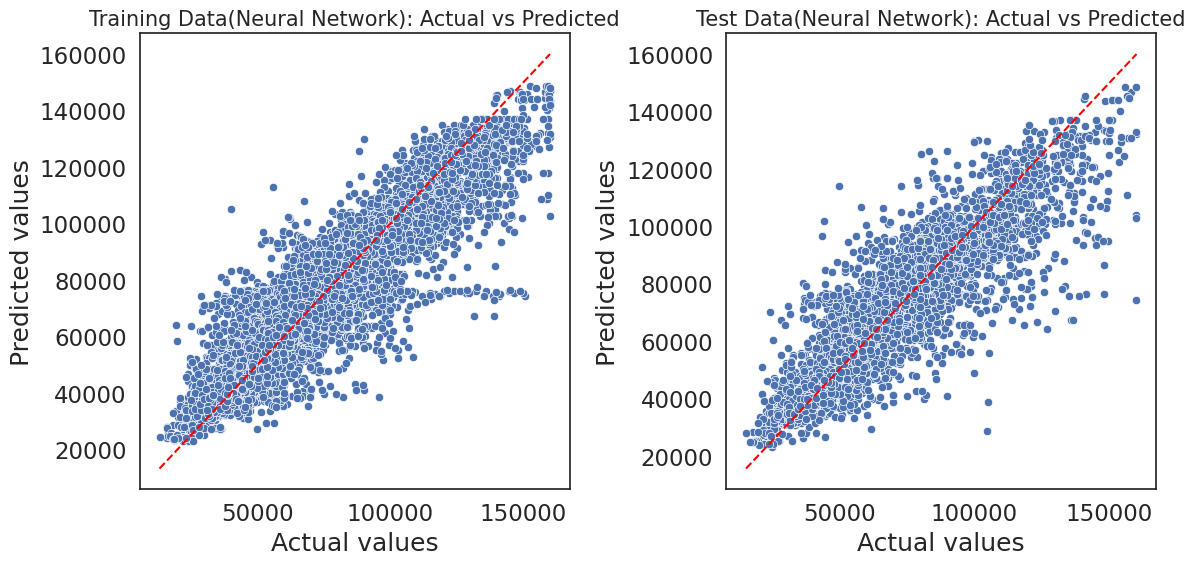

In [30]:
# Scatter plot of actual vs. predicted values for Neural Network
plt.figure(figsize=(12, 6))

# Plotting for training data
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_train_pred.flatten())  # Use flatten() to make sure y_train_pred is 1D
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.title('Training Data(Neural Network): Actual vs Predicted', fontsize=15)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

# Plotting for test data
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred.flatten())  # Use flatten() to make sure y_pred is 1D
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Test Data(Neural Network): Actual vs Predicted', fontsize=15)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.tight_layout()
plt.show()

# Visualization of Model Evaluation Metrics

We visualize the evaluation metrics for the trained models. Using bar plots, we compare the performance metrics between models and between training and test datasets.


In [31]:
# Setting display options for a more aesthetically pleasing output
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
display(model_metrics)

,Data,Method,R^2,Adjusted R^2,MAE,MSE,RMSE
0,Training set,Linear Regression,0.3797,0.3789,15391,411032381,20274
1,Testing set,Linear Regression,0.3651,0.3632,15235,402302484,20057
2,Training set,XGBoost Regressor,0.9343,0.9342,4387,43549356,6599
3,Testing set,XGBoost Regressor,0.8770,0.8766,5721,77956264,8829
4,Training set,AdaBoost Regressor,0.4844,0.4837,14690,341653956,18484
5,Testing set,AdaBoost Regressor,0.4647,0.4631,14789,339217236,18418
6,Training set,CatBoost Regressor,0.9282,0.9281,4589,47554169,6896
7,Testing set,CatBoost Regressor,0.8778,0.8774,5718,77455852,8801
8,Training set,Random Forest Regressor,0.9726,0.9726,2449,18125790,4257
9,Testing set,Random Forest Regressor,0.8937,0.8934,4931,67333749,8206


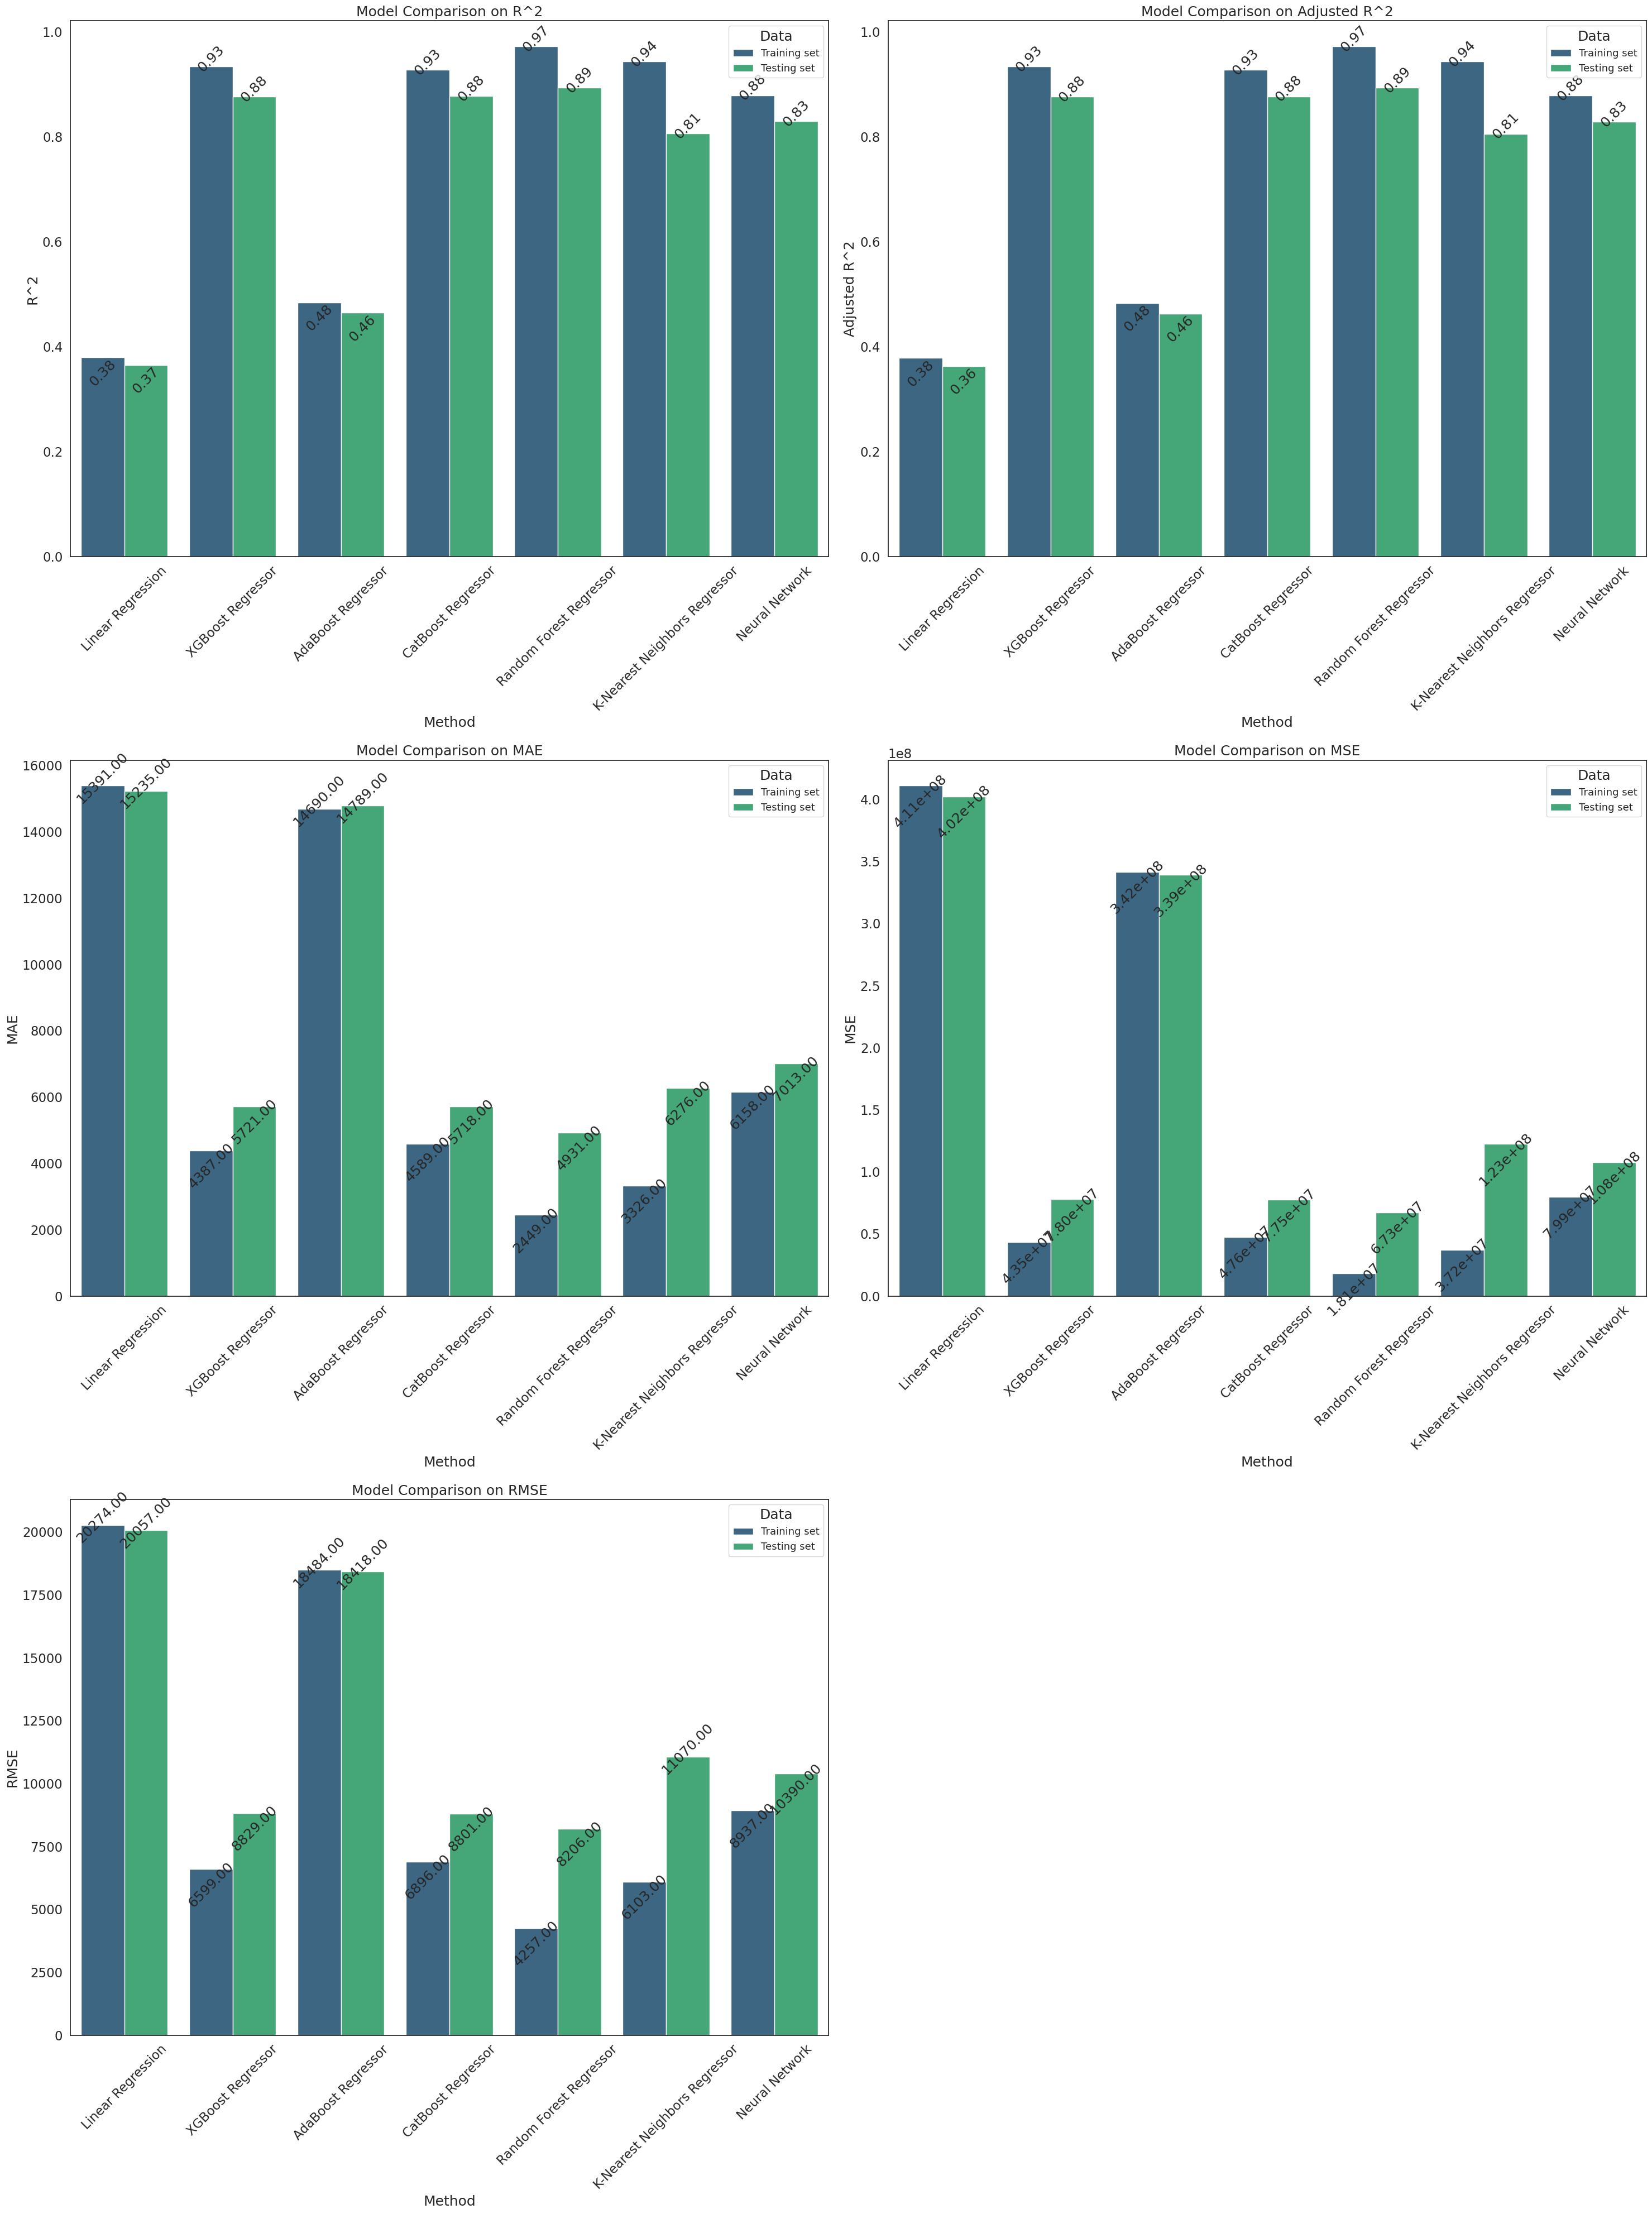

In [32]:
# Splitting data
metrics = ['R^2', 'Adjusted R^2', 'MAE', 'MSE', 'RMSE']

# Setting up the plot
plt.figure(figsize=(30, 40))

for i, metric in enumerate(metrics, 1):
    ax = plt.subplot(3, 2, i)
    sns.barplot(data=model_metrics, x='Method', y=metric, hue='Data', palette="viridis")

    for p in ax.patches:
        # If MSE, use scientific notation
        if metric == 'MSE':
            annotation = f'{p.get_height():.2e}'
        else:
            annotation = f'{p.get_height():.2f}'

            height_offset = 10 if p.get_height() > max(ax.get_ylim())/2 else -20

        ax.annotate(annotation,
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, height_offset),
                    textcoords='offset points',
                    rotation=45, fontsize=18)  # Reduced fontsize for clarity

    plt.title(f'Model Comparison on {metric}')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.legend(title='Data', fontsize=13)

plt.tight_layout()
plt.show()